In [1]:
import sympy as sp
import numpy as np
import math as m
import matplotlib.pyplot as plt
eps = 10**(-4)
xi = 1/15
A = 1/10
B = 1/12
c2 = xi
a21 = c2
b2 = 1/(2*c2)
b1 = 1 - b2
y1_0 = m.pi*B
y2_0 = m.pi*A
def f1(x,y1,y2):
    return A*y2
def f2(x,y1,y2):
    return -B*y1
x0 = 0
xk = m.pi

In [2]:
def analit(t0,f10,f20,t1):
    t = sp.symbols('t')
    f1 = sp.Function('f1')
    f2 = sp.Function('f2')
    eqs = (sp.Eq(f1(t).diff(t),A*f2(t)),sp.Eq(f2(t).diff(t),-B*f1(t)))
    s = sp.dsolve(eqs)
    y1g=s[0].args[1]
    y2g=s[1].args[1]
    sol=sp.solve([y1g.subs(t,t0)-f10,y2g.subs(t,t0)-f20])
    
    return y1g.subs(sol).subs(t,t1),y2g.subs(sol).subs(t,t1)


In [3]:
def RK2(x,y1,y2,h):
    k11 = h*f1(x,y1,y2)
    k12 = h*f2(x,y1,y2)
    k21 = h*f1(x+c2*h,y1+a21*k11,y2+a21*k12)
    k22 = h*f2(x+c2*h,y1+a21*k11,y2+a21*k12)
    return y1+b1*k11+b2*k21,y2+b1*k12+b2*k22

In [4]:
def Gill(x,y1,y2,h):
    k11 = h*f1(x,y1,y2)
    k12 = h*f2(x,y1,y2)
    k21 = h*f1(x+h/2,y1+k11/2,y2+k12/2)
    k22 = h*f2(x+h/2,y1+k11/2,y2+k12/2)
    k31 = h*f1(x+h/2,y1+k11*(m.sqrt(2)-1)/2+(1-1/m.sqrt(2))*k21,y2+k12*(m.sqrt(2)-1)/2+(1-1/m.sqrt(2))*k22)
    k32 = h*f2(x+h/2,y1+k11*(m.sqrt(2)-1)/2+(1-1/m.sqrt(2))*k21,y2+k12*(m.sqrt(2)-1)/2+(1-1/m.sqrt(2))*k22)
    k41 = h*f1(x+h,y1-k21/m.sqrt(2)+(1+1/m.sqrt(2))*k31,y2-k22/m.sqrt(2)+(1+1/m.sqrt(2))*k32)
    k42 = h*f2(x+h,y1-k21/m.sqrt(2)+(1+1/m.sqrt(2))*k31,y2-k22/m.sqrt(2)+(1+1/m.sqrt(2))*k32)
    ny1 = y1+k11/6+k21*(1-1/m.sqrt(2))/3+k31*(1+1/m.sqrt(2))/3+k41/6
    ny2 = y2+k12/6+k22*(1-1/m.sqrt(2))/3+k32*(1+1/m.sqrt(2))/3+k42/6
    return ny1,ny2

In [5]:
def Step(t0,tk,yt1_0,yt2_0,s):
    delt=1/max(abs(t0),abs(tk))**(s+1) + m.sqrt(f1(t0,yt1_0,yt2_0)**2+f1(t0,yt1_0,yt2_0)**2)**(s+1)
    h = (eps/delt)**(1/(s+1))
    return h

In [6]:
def Method_const(x0,xk,y1_0,y2_0,funk,s):
    h=Step(x0,xk,y1_0,y2_0,s)
    err = 1
    while err>10**(-4):
        x1=x0
        y11=y1_0
        y12=y2_0
        while x1<xk:
            xold=x1
            yold1=y11
            yold2=y12
            y11,y12 = funk(x1,y11,y12,h)
            x1+=h
        hdel=x1-xk
        y111,y121 = funk(xold,yold1,yold2,h-hdel)
        h=h/2
        y11=y1_0
        y12=y2_0
        x1=x0
        while x1<xk:
            xold=x1
            yold1=y11
            yold2=y12
            y11,y12 = funk(x1,y11,y12,h)
            x1+=h
        hdel=x1-xk
        y112,y122 = funk(xold,yold1,yold2,h-hdel)
        err = m.sqrt((y111 - y112)**2 + (y121 - y122)**2)/(2**s-1)
    return(y111,y121,h*2)

In [225]:
def Method_auto(x0,xk,y1_0,y2_0,funk,s):
    eps = 10**(-5)
    x1=x0
    yold1 = y1_0
    yold2 = y2_0
    Hp = np.array([0])
    Xp = np.array([0])
    Ep = np.array([0])
    Rp = np.array([0])
    h=Step(x0,xk,y1_0,y2_0,s)
    while x1<xk:
        y11,y12 = funk(x1,yold1,yold2,h)
        y111,y121 = funk(x1,yold1,yold2,h/2)
        y111,y121 = funk(x1+h/2,y111,y121,h/2)
        err = m.sqrt((y11-y111)**2+(y12-y121)**2)/(1-2**(-s))
    
        if err>eps*2**s:
            h=h/2
        if err > eps and err <=eps*2**s:
            y1a,y2a = analit(x1,yold1,yold2,x1+h)
            yold1 = y111
            yold2 = y121
            err1= m.sqrt((yold1-y1a)**2+(yold2-y2a)**2)
            Ep = np.append(Ep,[err1/err])
            Xp = np.append(Xp,[x1])
            Xp = np.append(Xp,[x1])
            Hp = np.append(Hp,[h])
            h = h/2
            print(err1)
        if err <= eps and err >=eps/2**(s+1):
            y1a,y2a = analit(x1,yold1,yold2,x1+h)
            yold1 = y11
            yold2 = y12
            err1= m.sqrt((yold1-y1a)**2+(yold2-y2a)**2)
            Ep = np.append(Ep,[err1/err])
            Xp = np.append(Xp,[x1])
            x1 = x1 + h
            Hp = np.append(Hp,[h])
        if err < eps/2**(s+1):
            y1a,y2a = analit(x1,yold1,yold2,x1+h)
            yold1 = y11
            yold2 = y12
            err1= m.sqrt((yold1-y1a)**2+(yold2-y2a)**2)
            Ep = np.append(Ep,[err1/err])
            Xp = np.append(Xp,[x1])
            x1 = x1 + h
            Hp = np.append(Hp,[h])
            h = h*2 
    y11,y12 = funk(x1,yold1,yold2,h-x1-xk)
    y111,y121 = funk(x1,yold1,yold2,(h-x1-xk)/2)
    y111,y121 = funk(x1+h/2,y111,y121,(h-x1-xk)/2)
    err = m.sqrt((y11-y111)**2+(y12-y121)**2)/(1-2**(-s))
    
    Xp = np.append(Xp,[xk])
    Hp = np.append(Hp,[x1-xk])
    y1a,y2a = analit(x1,yold1,yold2,xk)
    err1= m.sqrt((y11-y1a)**2+(y12-y2a)**2)
    Ep = np.append(Ep,[err1/err])
    
    Xp=np.delete(Xp,0,axis=0)
    Hp=np.delete(Hp,0,axis=0)
    Ep = np.delete(Ep,0,axis=0)
    plt.figure(1)
    plt.plot(Xp,Hp)
    plt.title("Изменение величины шага (3.3.1)")
    plt.grid()
    plt.figure(2)
    plt.plot(Xp,Ep)
    plt.title("Отношение погрешности к её оценке (3.3.2)")
    plt.grid()
    return(y111,y121)

In [226]:
analit(x0,y1_0,y2_0,xk)


(0.348455599656073, 0.233725029563602)

In [227]:
Method_const(x0,xk,y1_0,y2_0,RK2,2)

(0.34845775424037334, 0.23372240769788413, 0.14568788088814205)

In [228]:
Method_const(x0,xk,y1_0,y2_0,Gill,4)

(0.34845559704536894, 0.23372503256225202, 0.497903605805696)

(0.16177322296670582, 0.3667473059767268)

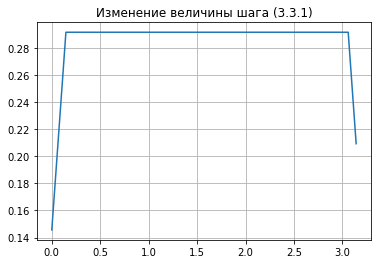

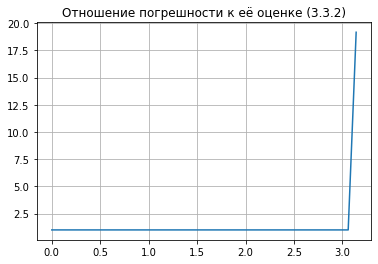

In [229]:
Method_auto(x0,xk,y1_0,y2_0,RK2,2)

(0.2242984429391878, 0.3374707674442515)

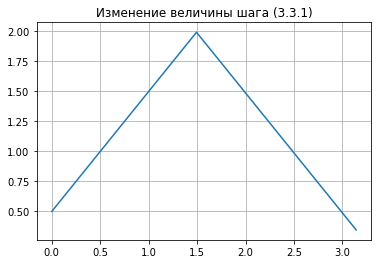

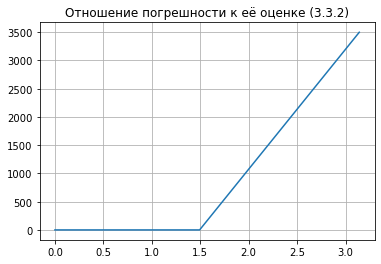

In [230]:
Method_auto(x0,xk,y1_0,y2_0,Gill,4)

In [231]:
def Part32(x0,xk,y1_0,y2_0,funk,h):
    x = x0
    y11 = y1_0
    y12 = y2_0
    
    R = np.array([0])
    
    xar = np.array([0])
    while x < xk:
        xold = x
        yold11 = y11
        yold12 = y12
        
        y1an,y2an =  analit(x0,y1_0,y2_0,x+h)
        
        y11,y12 = funk(x,y11,y12,h)
        
        R = np.append(R,[m.sqrt((y1an-y11)**2+(y2an-y12)**2)])

        xar = np.append(xar,[x])
        x = x + h
    hdel = x - xk
    y1an,y2an = analit(x0,y1_0,y2_0,xk)
    xar = np.append(xar,[xk])
    y11,y12 = funk(x,yold11,yold12,h-hdel)
   
    R = np.append(R,[m.sqrt((y1an-y11)**2+(y2an-y12)**2)])
    
    
    R=np.delete(R,0,axis=0)
    
    xar=np.delete(xar,0,axis=0)
    plt.grid()
  
    plt.plot(xar,R)
    return

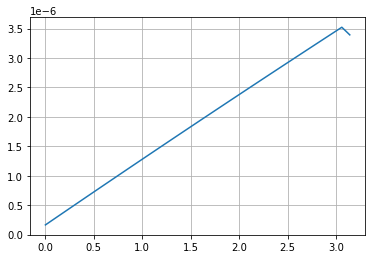

In [177]:
Part32(x0,xk,y1_0,y2_0,RK2,0.14568788088814205)


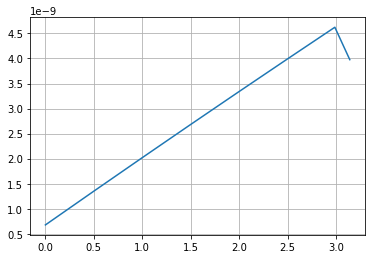

In [178]:
Part32(x0,xk,y1_0,y2_0,Gill,0.497903605805696)

In [182]:
def Part333(x0,xk,y1_0,y2_0,funk,eps,s):
    k = 0
    if funk == RK2: kd=4
    else: kd=8
    x1=x0
    yold1 = y1_0
    yold2 = y2_0
    h=Step(x0,xk,y1_0,y2_0,s)
    while x1<xk:
        y11,y12 = funk(x1,yold1,yold2,h)
        y111,y121 = funk(x1,yold1,yold2,h/2)
        y111,y121 = funk(x1+h/2,y111,y121,h/2)
        k+=kd*3
        err = m.sqrt((y11-y111)**2+(y12-y121)**2)/(1-2**(-s))
        if err>eps*2**s:
            h=h/2
        if err > eps and err <=eps*2**s:
            yold1 = y111
            yold2 = y121
            x1 = x1 + h
            h = h/2
        if err <= eps and err >=eps/2**(s+1):
            yold1 = y11
            yold2 = y12
            x1 = x1 + h
        if err < eps/2**(s+1):
            yold1 = y11
            yold2 = y12
            x1 = x1 + h
            h = h*2 
    y111,y121 = funk(x1,yold1,yold2,xk-x1)
    k+=kd
    
    return k

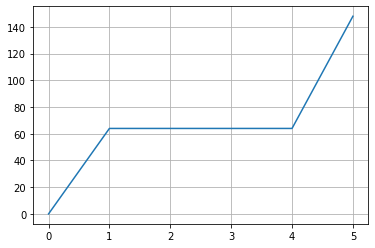

In [183]:
e = np.array([0])
kol = np.array([0])
for i in range(1,6):
    e = np.append(e,[i])
    kol = np.append(kol,[Part333(x0,xk,y1_0,y2_0,RK2,10**(-i),2)])
plt.plot(e,kol)
plt.grid()

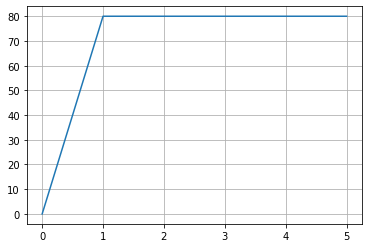

In [184]:
e = np.array([0])
kol = np.array([0])
for i in range(1,6):
    e = np.append(e,[i])
    kol = np.append(kol,[Part333(x0,xk,y1_0,y2_0,Gill,10**(-i),4)])
plt.plot(e,kol)
plt.grid()